Flavien Moise, Tenzin Nargee, Charlie Payne, Duncan Tanner

4.23.2024

Professor Johnson

DS 3001

# CHD Project Findings

## Summary

Our project builds predictive algorithms that analyze the likelihood of a person developing coronary heart disease (CHD) within ten years, measured by the variable TenYearCHD. We use three tools to make correlation predictions between 15 independent variables and TenYearCHD, including k nearest neighbor, linear regression, and decision trees. The variables analyzed include things such as sex, age, and education, as well as things like heart rate, systolic blood pressure measure, and BMI. The methods suggested that sysBP, BMI, and glucose were the best predictors of TenYearCHD overall. That being said, our results were not entirely conclusive. Issues arose with the linear regression analysis, for example, due to the nature of the variable types, which led us to approach the problem using a logistic regression analysis for a slightly better analysis. The results of our k nearest neighbor method also suggested limited predictive power for given variables due to the complex nature of the data set and their correlations.

## Data

As the chart below defines, we analyzed 15 key variables measured in 3,179 individuals for their predictive power in estimating the 10-year risk of coronary heart disease (listed last).

| Variable Name      | Definition |
| ----------- | ----------- |
| age | Age at the time of medical examination in years |
| BMI | Body Mass Index, weight (kg)/height (m)2 |
| BPMeds | Use of Anti-hypertensive medication at the exam |
| cigsPerDay | Number of cigarettes smoked each day | 
| currentSmoker | Current cigarette smoking at the time of examinations |
| diabetes Diabetic | according to criteria of the first exam treated |
| diaBP | Diastolic blood pressure (mmHg) |
| education | A categorical variable of the participants' education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4) |
| glucose | Blood glucose level (mg/dL) |
| heartRate | Heart rate (beats/minute) |
| prevalentHyp | Prevalent Hypertensive. The subject was defined as hypertensive if treated.
| prevalentStroke | Prevalent Stroke (0 = free of disease) |
| sex | The recorded sex of the observations with 1 denoting a participant coded as male | 
| sysBP | Systolic Blood Pressure (mmHg) |
| totChol | Total cholesterol (mg/dL) |
| TenYearCHD | The 10-year risk of coronary heart disease (CHD), the target variable |

The first step in dealing with the data was to address missing values. To do so, we used print(df.isnull().sum()) to identify which variables held missing values. We found that the variables education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose all had null values, which we had to clean using the fillna function to replace missing values. With the decision tree regression, we replaced missings with median results using SimpleImputer and then scaled the features using StandardScaler. In the case of k nearest neighbor, we used KNN imputer and standard scaler to address missings, shifting the r2significantly. 

#### Data cleaning for the decision tree

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

tree_df = pd.read_csv('fhs_train.csv')
tree_df2 = pd.read_csv('fhs_test.csv')

if 'Unnamed: 0' in tree_df.columns:
    tree_df.drop('Unnamed: 0', axis=1, inplace=True)
    tree_df2.drop('Unnamed: 0', axis=1, inplace=True)

print(tree_df.head())
print(tree_df.isnull().sum())

   sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   58        1.0              0         0.0     0.0                0   
1    0   40        1.0              1        15.0     0.0                0   
2    0   52        1.0              0         0.0     0.0                0   
3    1   38        2.0              1        43.0     0.0                0   
4    0   43        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    220.0  143.0  104.0  29.85         75     87.0   
1             0         0    199.0  122.0   82.0  22.16         85     77.0   
2             0         0    275.0  112.0   71.0  25.68         80      NaN   
3             1         0    170.0  130.0   94.0  23.90        110     75.0   
4             0         0    202.0  124.0   92.0  21.26         75     74.0   

   TenYearCHD  
0           1  
1           0  
2       

In [14]:
# Fill missing values using median for numerical columns
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(tree_df), columns=tree_df.columns)
df2_filled = pd.DataFrame(imputer.fit_transform(tree_df2), columns=tree_df.columns)
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filled), columns=tree_df.columns)
df2_scaled = pd.DataFrame(scaler.fit_transform(df2_filled), columns=tree_df.columns)

#### Data cleaning for k nearest neighbor

In [3]:
knn_df = pd.read_csv('fhs_train.csv')
knn_df2 = pd.read_csv('fhs_test.csv')
print(knn_df.head())
print(knn_df.isnull().sum())

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [4]:
#I know we didn't go over it it in class, but after doing some research I found that sklearn had an imputer for missing values for knns. 
#Using KNN imputer and robust scaler results in an r2 of -0.027055288288905466
#BUT using KNN imputer and standard scaler results in an r2 of -0.01220595774255906

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
imp = KNNImputer(n_neighbors=5)
ss = StandardScaler()
rs = RobustScaler()
print(knn_df['TenYearCHD'].value_counts())
knn_df = pd.DataFrame(imp.fit_transform(knn_df), columns=knn_df.columns)
knn_df2 = pd.DataFrame(imp.fit_transform(knn_df), columns=knn_df.columns)
knn_df = pd.DataFrame(ss.fit_transform(knn_df), columns=knn_df.columns)
knn_d2 = pd.DataFrame(ss.fit_transform(knn_df), columns=knn_df.columns)
print(knn_df.isna().sum())
print(knn_df['TenYearCHD'].value_counts())
#accidentally standardized the results as well... fixing that here
knn_df['TenYearCHD'][knn_df['TenYearCHD']<0]=0
knn_df['TenYearCHD'][knn_df['TenYearCHD']>0]=1
knn_df2['TenYearCHD'][knn_df['TenYearCHD']<0]=0
knn_df2['TenYearCHD'][knn_df['TenYearCHD']>0]=1
print(knn_df['TenYearCHD'].value_counts())

TenYearCHD
0    2693
1     487
Name: count, dtype: int64
Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
TenYearCHD
-0.425252    2693
 2.351547     487
Name: count, dtype: int64
TenYearCHD
0.0    2693
1.0     487
Name: count, dtype: int64


#### Data cleaning for linear regression

With linear regression, which required the most preparation, we started with addressing missings in the train data, which we replaced using medians for almost all features. For the variable “glucose,” we replaced missings using a linear regression approach due to the number of missings (285). 

To prepare the data for linear regression after cleaning the training data, we created box plots of each feature to visualize distributions and outliers and aid us going forward. When addressing missing values, we followed the same steps for the test data as we did for the training data. We then used OneHotEncoder and “df_change” to convert categorical variables like “education” into a numerical format that allows the model to run more effectively. Using OneHotEncoder required us to split the data into categorical and numerical values before applying the algorithm. Afterward, we combined encoded categorical and numerical columns. Finally, we split the data into X_train_encoded, X_test_econded, y_train, and y_test, where y was the outcome variable “TenYearCHD” and X were the features used to predict y. Now, we can apply the “LinearRegression()” model. We followed similar, shorter steps for splitting the train and test data for the decision tree and kNN.


In [3]:
linear_df = pd.read_csv('fhs_train.csv')

#Identifying missing values
print(linear_df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [4]:
# Impute missing values for variables with low missings using median (avoid outliers)
linear_df['education'].fillna(linear_df['education'].median(), inplace=True)
linear_df['cigsPerDay'].fillna(linear_df['cigsPerDay'].median(), inplace=True)
linear_df['BPMeds'].fillna(linear_df['BPMeds'].median(), inplace=True)
linear_df['totChol'].fillna(linear_df['totChol'].median(), inplace=True)
linear_df['BMI'].fillna(linear_df['BMI'].median(), inplace=True)
print(linear_df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [5]:
#For glucose, which has a relatively high missing value count, we will use some linear regression to do predictive imputation.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Separate data
complete_data = linear_df[linear_df['glucose'].notnull()]
missing_data = linear_df[linear_df['glucose'].isnull()]

# Define features and target for imputation
linear_X_train = complete_data.drop(['glucose'], axis=1)
linear_y_train = complete_data['glucose']
linear_X_incomplete = missing_data.drop(['glucose'], axis=1)

# init. and train linear regression model for imputation
imputation_model = LinearRegression()
imputation_model.fit(linear_X_train, linear_y_train)

# missing values
imputed_values = imputation_model.predict(linear_X_incomplete)

# Fill missing values in the original dataframe
linear_df.loc[linear_df['glucose'].isnull(), 'glucose'] = imputed_values
print(linear_df.isnull().sum())

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


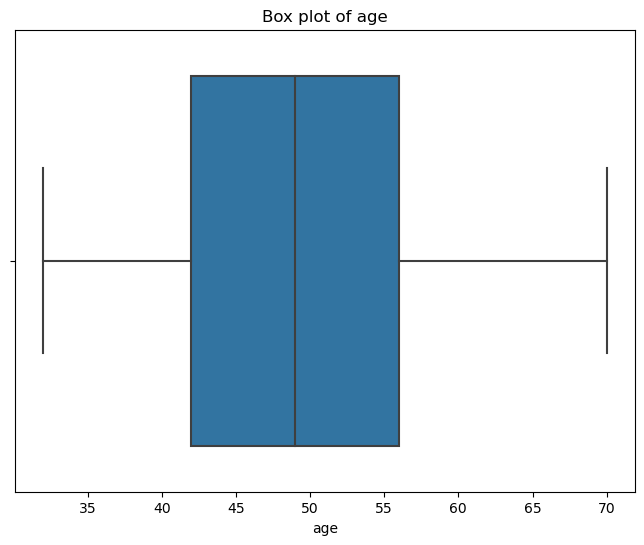

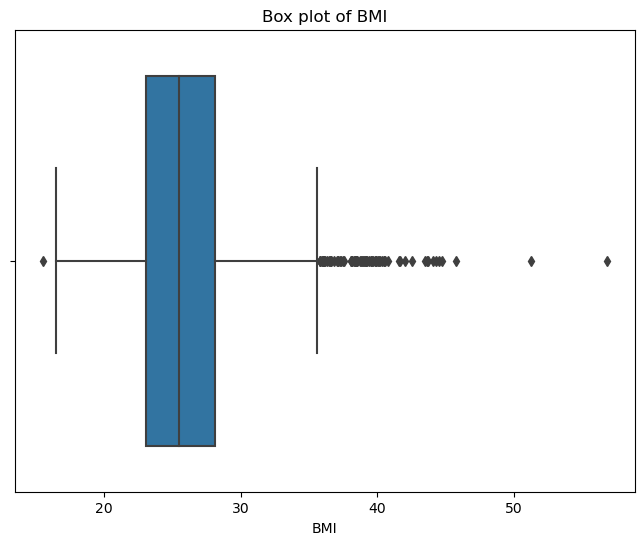

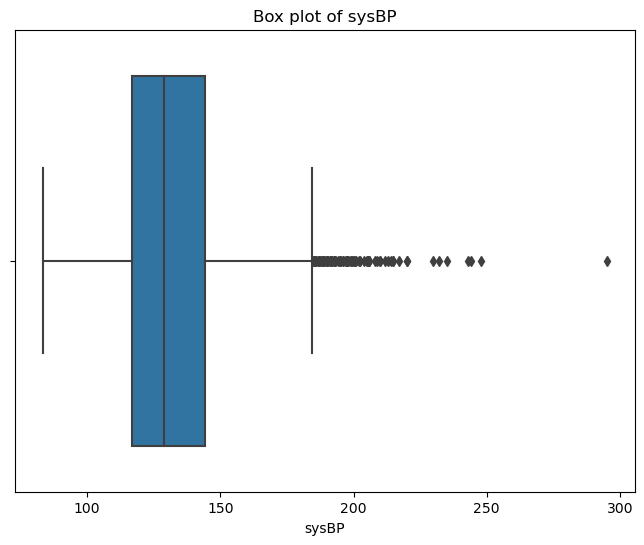

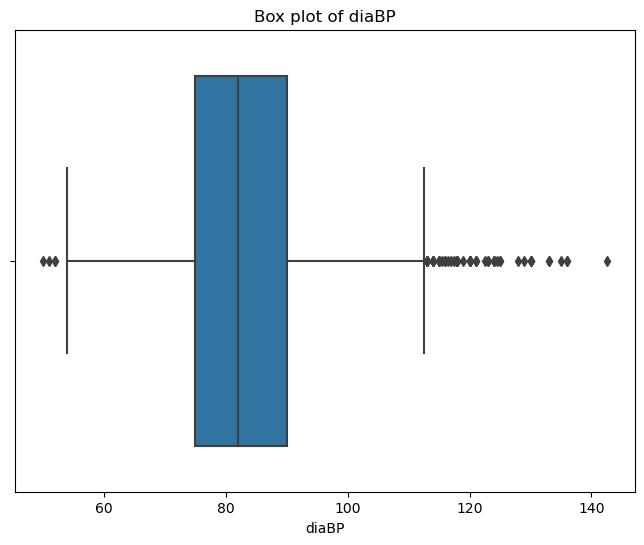

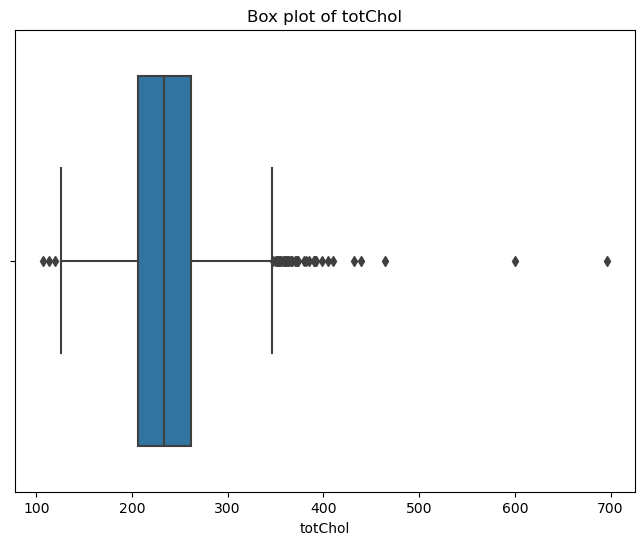

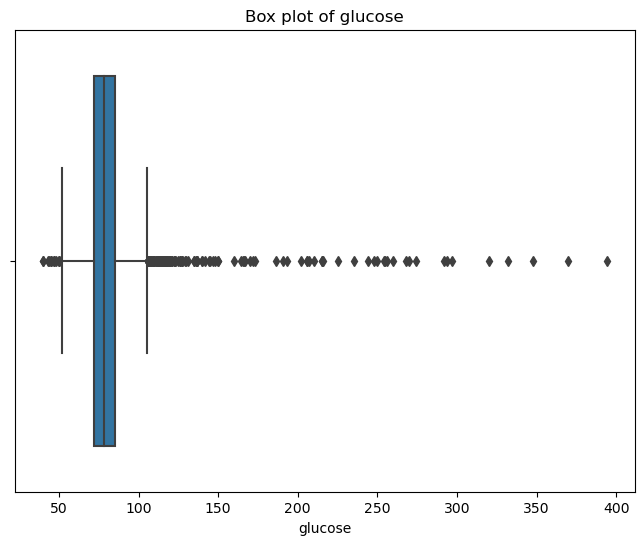

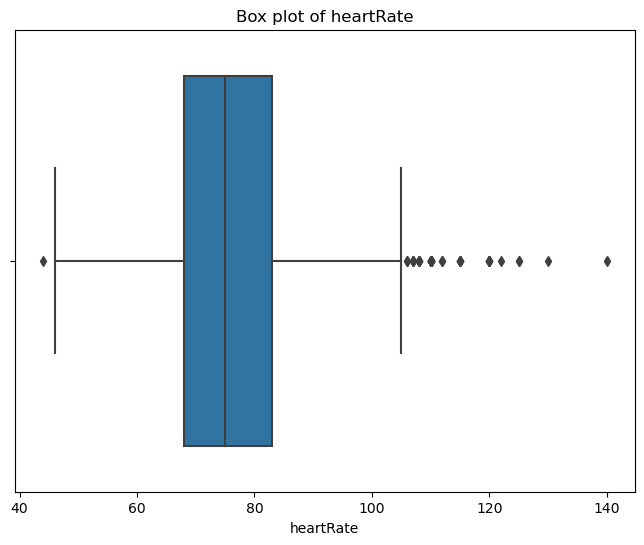

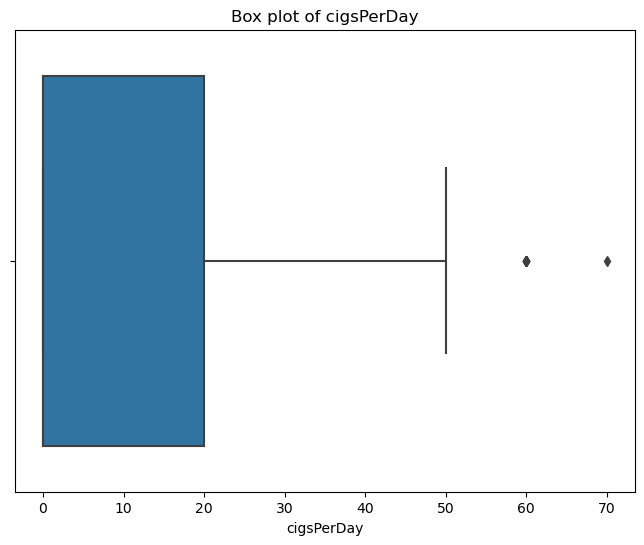

In [6]:
#Now that the data is free of missing values, we can look at outliers for variables that may contain some
key_var = ['age', 'BMI', 'sysBP', 'diaBP', 'totChol', 'glucose', 'heartRate', 'cigsPerDay']
for feature in key_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=linear_df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [7]:
#Lets use one-hot encoding for categorical variable eduction. Will ensure regression can appropriately use this data. 
#generate a DataFrame with one-hot encoded columns for the "education" variable based on the existing numeric codes in the dataset. 
#Each education level will be represented by a separate binary column.

df_change = pd.DataFrame({'education': [1, 2, 3, 4]})

linear_df = pd.get_dummies(linear_df, columns=['education'], drop_first=False)
print(linear_df)

      Unnamed: 0  sex  age  currentSmoker  cigsPerDay  BPMeds  \
0           1267    1   58              0         0.0     0.0   
1           1209    0   40              1        15.0     0.0   
2           2050    0   52              0         0.0     0.0   
3           1183    1   38              1        43.0     0.0   
4           3225    0   43              0         0.0     0.0   
...          ...  ...  ...            ...         ...     ...   
3175        1411    1   36              0         0.0     0.0   
3176         262    1   47              1        20.0     0.0   
3177        1459    1   52              0         0.0     0.0   
3178         733    0   48              1         5.0     0.0   
3179         691    0   60              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    220.0  143.0  104.0  29.85   
1                   0             0         0    199.0  122.0

In [8]:
# Begin Linear Regression with clean data
#Let's clean the test data in the same way quickly so that we can ensure consistency.
df01 = pd.read_csv('fhs_test.csv')
print(df01.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


In [9]:
df01['education'].fillna(df01['heartRate'].median(), inplace=True)
df01['cigsPerDay'].fillna(df01['heartRate'].median(), inplace=True)
df01['BPMeds'].fillna(df01['heartRate'].median(), inplace=True)
df01['totChol'].fillna(df01['heartRate'].median(), inplace=True)
df01['heartRate'].fillna(df01['heartRate'].median(), inplace=True)
df01['BMI'].fillna(df01['BMI'].median(), inplace=True)
print(df01.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            103
TenYearCHD           0
dtype: int64


In [10]:
# Separate data
complete_testing = df01[df01['glucose'].notnull()]
missing_testing = df01[df01['glucose'].isnull()]

# Define features and target for imputation
X_ttrain = complete_testing.drop(['glucose'], axis=1)
y_ttrain = complete_testing['glucose']
X_tincomplete = missing_testing.drop(['glucose'], axis=1)

# init. and train linear regression model for imputation
imputation_testing = LinearRegression()
imputation_testing.fit(X_ttrain, y_ttrain)

# missing values
imputed_tvalues = imputation_testing.predict(X_tincomplete)

# Fill missing values in the original dataframe
df01.loc[df01['glucose'].isnull(), 'glucose'] = imputed_tvalues
df01_change = pd.DataFrame({'education': [1, 2, 3, 4]})
df01 = pd.get_dummies(df01, columns=['education'], drop_first=False)

training_data = linear_df
testing_data = df01

combined_data = pd.concat([training_data, testing_data])

categorical_cols = ['sex', 'education_1.0','education_2.0','education_3.0','education_4.0', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# apply OneHotEncoder to categorical columns
encoder = OneHotEncoder()
X_combined_encoded = encoder.fit_transform(combined_data[categorical_cols]).toarray()

#Combine encoded categorical columns and numerical columns
X_combined_encoded = pd.DataFrame(X_combined_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_combined_encoded[numerical_cols] = combined_data[numerical_cols].values

y_combined = combined_data['TenYearCHD']

#now that the data is consisten, split back up again:
linear_X_train_encoded = X_combined_encoded[:len(training_data)]
linear_X_test_encoded = X_combined_encoded[len(training_data):]
linear_y_train = y_combined[:len(training_data)]
linear_y_test = y_combined[len(training_data):]

## Results

The first algorithm we used to predict the outcome variable was the decision tree, which was pretty straightforward. After replacing missing values and scaling the data, we used “DecisionTreeClassifier” to create and plot the decision tree below. 

R-squared score: -0.94
Accuracy: 0.75
Confusion Matrix:
[[758 145]
 [115  42]]


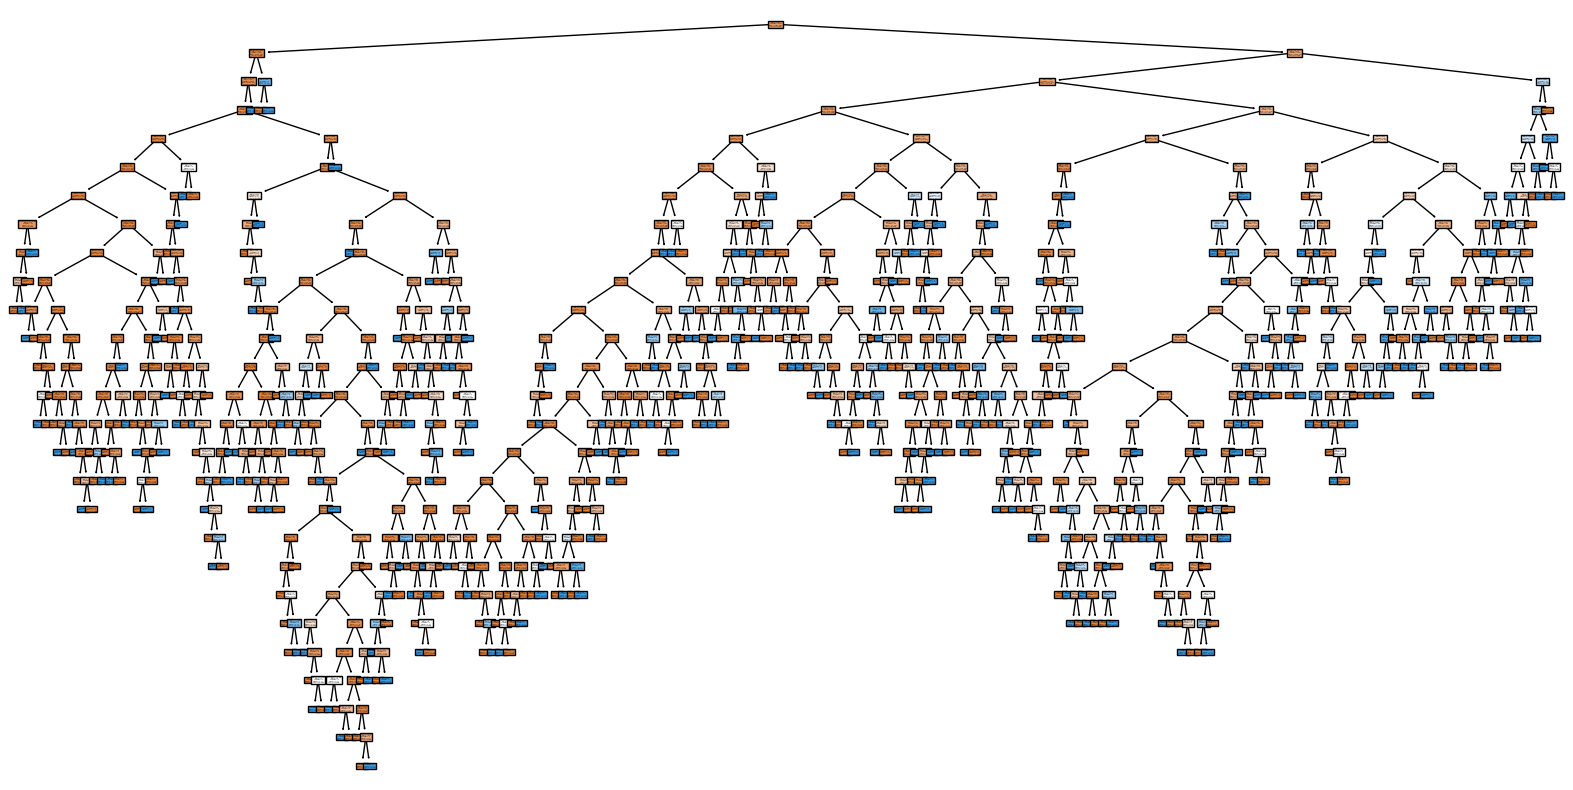

In [15]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
# Split data into features and target variable
X_train = df_scaled.drop('TenYearCHD', axis=1)
y_train = df_scaled['TenYearCHD']
X_test = df2_scaled.drop('TenYearCHD', axis=1)
y_test = df2_scaled['TenYearCHD']

# Convert y to binary
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict the test values
y_pred = tree_model.predict(X_test)

# Calculate & show r2
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

#Calculate & show accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=list(X_train.columns), class_names=['No CHD', 'Yes CHD'])
plt.show()

We then used feature importance scores to rank which features were most likely to predict coronary heart disease, which are calculated based on how much each feature reduces Gini impurity. Features with the highest importance scores (more likely to be predictive of the outcome variable
(“TenYearCHD”) were “sysBP” (0.148), glucose (“0.126”), “BMI” (0.158), “diaBP” (0.111), and “age” (0.128). The least essential features were “BPMeds” (0.008), “diabetes” (0.004), and “prevalentStroke” (0.003). 

In [6]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}): {X_train.columns[indices[f]]}")

Feature ranking:
1. feature 12 (0.15806487153232976): BMI
2. feature 10 (0.1481921428274172): sysBP
3. feature 1 (0.1280580734739721): age
4. feature 14 (0.12644755551974532): glucose
5. feature 11 (0.11137080469060226): diaBP
6. feature 9 (0.10705156345039417): totChol
7. feature 13 (0.0912750384332549): heartRate
8. feature 4 (0.03819356243484946): cigsPerDay
9. feature 2 (0.03722310176823784): education
10. feature 0 (0.017964496479851044): sex
11. feature 3 (0.013133906370688014): currentSmoker
12. feature 7 (0.008307372412772913): prevalentHyp
13. feature 5 (0.0076496627151257076): BPMeds
14. feature 8 (0.004329896555371925): diabetes
15. feature 6 (0.0027379513353873912): prevalentStroke


The second algorithm we used was linear (and eventually logistic) regression. After cleaning and preparing the data, we applied the algorithm, giving us the following result. 

In [11]:
#REGRESSION MODEL
reg_model = LinearRegression()
reg_model.fit(linear_X_train_encoded, linear_y_train)

# Get coefficients and corresponding feature names
coefficients = reg_model.coef_
feature_names_encoded = list(linear_X_train_encoded.columns)

# Combine feature names and coefficients
feature_coefficients = list(zip(feature_names_encoded, coefficients))

# Sort the feature coefficients by absolute coefficient value in descending order
sorted_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Display the top positive coefficients
num_top_coefficients = 10  # You can adjust this number as needed
print(f"Top {num_top_coefficients} Positive Coefficients:")
count = 0
for feature, coefficient in sorted_coefficients:
    if count >= num_top_coefficients:
        break
    if coefficient > 0:  # Only print positive coefficients
        print(f"{feature}: {coefficient:.4f}")
        count += 1

Top 10 Positive Coefficients:
prevalentStroke_1: 0.0929
BPMeds_1.0: 0.0349
sex_1: 0.0308
diabetes_1: 0.0281
education_2.0_False: 0.0108
prevalentHyp_1: 0.0104
currentSmoker_0: 0.0088
age: 0.0066
education_4.0_True: 0.0046
education_1.0_True: 0.0036


In [12]:
#PREDICTION
y_pred = reg_model.predict(linear_X_test_encoded)

#EVALUATION
diff_squared = (linear_y_test - y_pred) ** 2
MSE = diff_squared.mean()
print("Mean Squared Error: " , MSE)
print("Root Mean Squared Error: " , np.sqrt(MSE))

Mean Squared Error:  0.11508826999324692
Root Mean Squared Error:  0.3392466211965079


In [13]:
var_y = linear_y_test.var()
r2 = 1 - (MSE / var_y)
print("R-squared Score:", r2)

R-squared Score: 0.08873333334589295


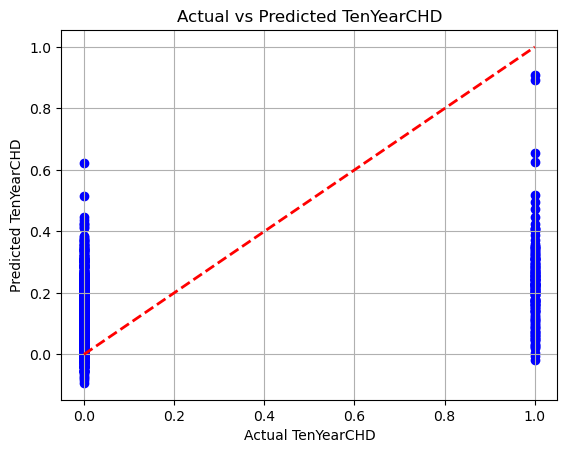

In [14]:
# There is clearly a (really) poor fit. Lets graph

plt.scatter(linear_y_test, y_pred, color='blue')
plt.plot([linear_y_test.min(), linear_y_test.max()], [linear_y_test.min(), linear_y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual TenYearCHD')
plt.ylabel('Predicted TenYearCHD')
plt.title('Actual vs Predicted TenYearCHD')
plt.grid(True)
plt.show()

The most positive coefficients (i.e., stronger positive relationship between that feature and the target variable) were those of “prevalentStroke” (0.0929), “BPMeds_1.0” (0.0349), and “sex_1” (0.0308). (“BPMeds_1.0” and “sex_1” were renamed by OneHotEncoder as mentioned previously, where “BPMeds_1.0” represents true for the use of anti-hypertensive medication and “sex_1” represents
male). For this regression, the mean squared error was 0.115, the root mean squared error was 0.339, and the r-squared was 0.0887. From these coefficients (which were almost entirely opposite to the results from the decision tree) and the graph, we can see that linear regression does not do a great job at predicting the outcome of “TenYearCHD,” especially since it is binary. Due to this, we turned to logistic regression, which is better suited for binary classifications. Logistic regression provided us with the following classification report and confusion matrix: 


| | Precision | Recall f-1 score support |
| ----------- | ----------- | ----------- |
| 0 | 0.86 | 0.99 0.92 903 |
| 1 | 0.59 | 0.08 0.15 157 |
| Accuracy |  | 0.86 1060 |
| Macro avg | 0.73 | 0.54 0.53 1060 | 
| Weighted avg | 0.82 | 0.86 0.81 1060 |


It is essential to notice the difference in results between classes 0 and 1 here. For example, the recall for class 0 (0.99) is extremely high, indicating that the model correctly classified most instances of not having CHD. On the other hand, recall for class 1 (0.08) is extremely low, indicating the model missed many positive CHD cases. Precision numbers for 0 (0.86) suggest that when the model predicts negative outcomes, it is correct 86% of the time. Precision numbers for 1 (0.59), however, indicate that when the model predicts a positive result, it is only correct 59% of the time. F-1 scores, as well, are skewed in favor of 0. These discrepancies can be observed more plainly in the confusion matrix.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#indicates that you do not want to center (subtract the mean) from the data.
#This parameter is particularly relevant when working with sparse matrices or when centering is not meaningful or feasible for the data.
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(linear_X_train_encoded)
X_test_scaled = scaler.transform(linear_X_test_encoded)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=100)
log_model.fit(X_train_scaled, linear_y_train)

LogisticRegression(random_state=100)

In [18]:
y_log_pred = log_model.predict(X_test_scaled)

#EVALUATION

# probability predictions
y_log_prob = log_model.predict_proba(X_test_scaled)[:, 1]  # Probability CHD

# probabilities to binary labels using 0.5
y_log_pred = (y_log_prob >= 0.5).astype(int)  # binary class labels (0 or 1)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(linear_y_test, y_log_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(linear_y_test, y_log_pred))
log_r2 = r2_score(linear_y_test, y_log_pred)
print(f"R-squared score: {log_r2:.2f}")

Confusion Matrix:
[[894   9]
 [144  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       903
           1       0.59      0.08      0.15       157

    accuracy                           0.86      1060
   macro avg       0.73      0.54      0.53      1060
weighted avg       0.82      0.86      0.81      1060

R-squared score: -0.14


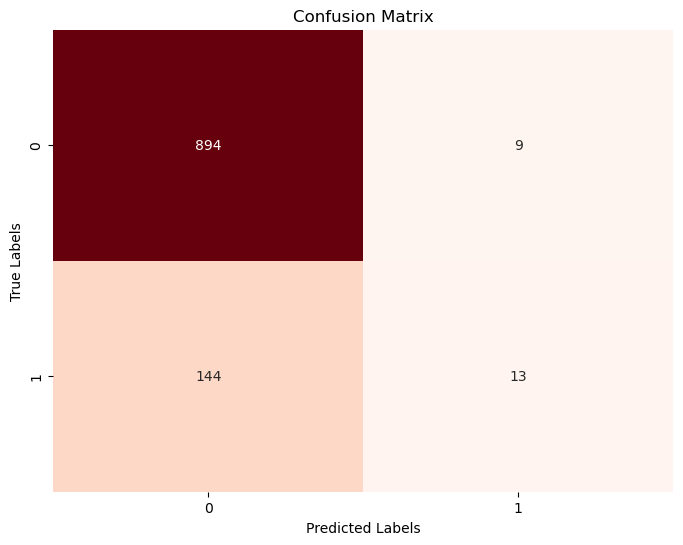

In [21]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix is quite simple: it shows 894 instances of true negatives (the model correctly predicted the lack of CHD) and 9 cases of false positives (the model predicted the presence of CHD when there were none). For all of the instances of CHD existing, the model did much less well, with 144 false negatives and 13 true positives. Overall, the logistic regression model is much better at predicting the lack of CHD than it is predicting the presence of CHD, which, due to the imbalanced nature of the data set (many more cases of 0 than 1), skews the overall accuracy of the model to 0.86, which is relatively high. 


We see this in the visualization of the Receiver Operating Characteristic (ROC) Curve.


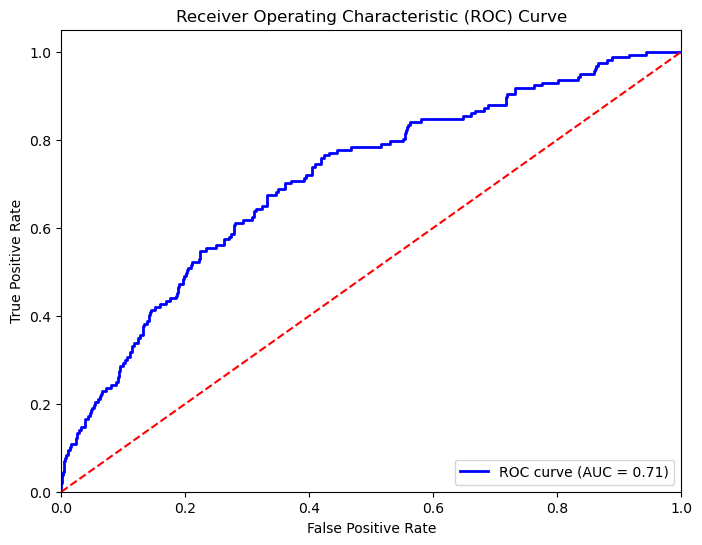

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(linear_y_test, y_log_prob)
roc_auc = roc_auc_score(linear_y_test, y_log_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve represents the actual positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It shows the trade-off between sensitivity and specificity. A curve that hugs the upper left corner indicates a better-performing model. The AUC score quantifies the model's overall performance across all threshold settings. It ranges from 0 to 1, where a score closer to 1 indicates better discrimination power of the model (i.e., the model can distinguish between positive and negative cases more effectively). An AUC of .5 means it would do no better than randomly picking. That said, an AUC of .71 is considered good, though there is room for improvement. Overall, logistic regression is more helpful in predicting CHD than linear regression.

Our last approach was kNN using sklearn, with an upper limit of 500 neighbors (k) to consider. Considering all features, we achieved an optimal k of 498 and an r-squared of -0.012. This indicated that the model’s performance was incredibly poor and did not fit the data well, suggesting our original approach was unsuitable for accurately predicting TenYearCHD. 


Best k: 498
R-squared of the best model: -0.01220595774255906


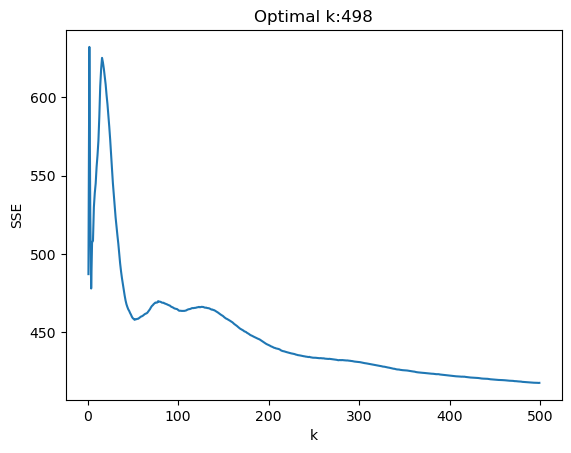

In [23]:
y_train = knn_df['TenYearCHD']
X_train = knn_df.drop('TenYearCHD',axis=1)
y_test = knn_df2['TenYearCHD']
X_test = knn_df2.drop('TenYearCHD',axis=1)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

k_bar = 500
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar - 1)
r2_scores = np.zeros(k_bar - 1)

for k in range(k_bar - 1):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat)**2)
    r2_scores[k] = r2_score(y_test, y_hat)

SSE_min = np.min(SSE)
min_index = np.argmin(SSE)
k_star = k_grid[min_index]
print("Best k:", k_star)

print("R-squared of the best model:", r2_scores[min_index])

plt.plot(np.arange(1, k_bar), SSE)
plt.xlabel("k")
plt.title("Optimal k:" + str(k_star))
plt.ylabel('SSE')
plt.show()

#not a very good r2...

Clearly, we needed to make changes. Instead, we attempted to mix and match a few features to include in the analysis, which we first attempted manually and then automated using “itertools” and “tqdm” to iterate over all combinations of features. We then trained the kNN model for each value of k to find the new optimal k value and the best combination of features, which we found were “sex,”
“currentSmoker,” “prevalentStroke,” “prevalentHyp,” and “diabetes.” This left us with an optimal k-value of 43 and an r-squared of 0.0366. 

Progress: 100%|██████████| 6884/6884 [2:57:06<00:00,  1.54s/combination]  

Best combination of variables: ('sex', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes')
Best k: 43
Best R-squared: 0.036635590042016886


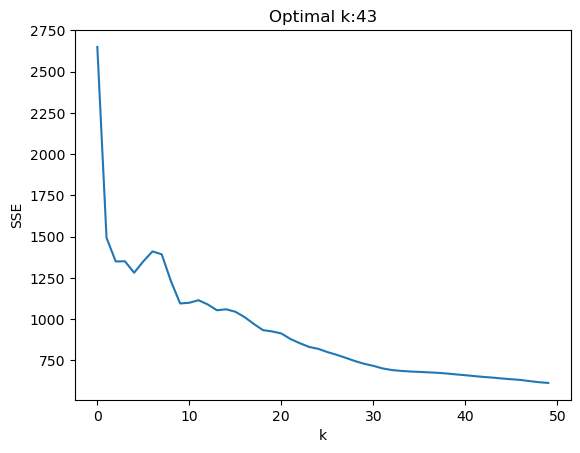

"\nBest combination of variables: ('age', 'sysBP', 'BMI', 'glucose')\nBest k: 48\nBest R-squared: 0.09504864401653368\n"

In [24]:
import itertools
from tqdm import tqdm

#Then I tried to mix-and-match a few variables, since putting them all together to the model was probably overcomplicating it. 
#After failing after a few combinations, I decided that this was too much work to do manually and decided to automate it. 
#Below is code written by myself and ChatGPT that brute forces every combination of 1 to 5 variables, and remembers the best r^2 value. 
#This code took about 3 hours to run. 
#As you can tell, this helped, but not much... increased r2 from -0.0122 to  0.0366. Yay!
#I realize I could have created a list of correlations/counts per cardiac and selected the ones that had the largest effect, but this basically did the same thing with a bit more work. 

# List of all variable names
all_variables = list(X_train.columns)

best_r2 = -np.inf  # Initialize the best R-squared value
best_model = None  # Initialize the best model
best_features = None  # Initialize the best set of features
best_k = None  # Initialize the best value of k

k_bar = 50
k_grid = np.arange(1, k_bar)

# Total number of combinationslen(all_variables) + 1
total_combinations = sum(1 for r in range(1, 6) for _ in itertools.combinations(all_variables, r))

# Initialize tqdm with the total number of combinations
progress_bar = tqdm(total=total_combinations, desc="Progress", unit="combination")

# Iterate over all possible combinations of variableslen(all_variables) + 1
for r in range(1, 6):
    for variable_combination in itertools.combinations(all_variables, r):
        # Create a DataFrame with only the selected features
        X_train_subset = X_train[list(variable_combination)]
        X_test_subset = X_test[list(variable_combination)]
        
        # Train KNN model for each value of k
        SSE = np.zeros(k_bar)
        r2_scores = np.zeros(k_bar)
        for k in range(k_bar):
            fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train_subset, y_train)
            y_hat = fitted_model.predict(X_test_subset)
            SSE[k] = np.sum((y_test - y_hat)**2)
            r2_scores[k] = r2_score(y_test, y_hat)

        # Find the optimal k for this combination of variables
        SSE_min = np.min(SSE)
        min_index = np.argmin(SSE)-1
        k_star = k_grid[min_index]

        # Check if this model is better than the current best model
        if r2_scores[min_index] > best_r2:
            best_r2 = r2_scores[min_index]
            best_model = fitted_model
            best_features = variable_combination
            best_k = k_star

        # Update the progress bar
        progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Print the results
print("Best combination of variables:", best_features)
print("Best k:", best_k)
print("Best R-squared:", best_r2)

# Plot SSE vs k for the best model
plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel("k")
plt.title("Optimal k:" + str(best_k))
plt.ylabel('SSE')
plt.show()

"""
Best combination of variables: ('sex', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes')
Best k: 43
Best R-squared: 0.036635590042016886
"""

## Conclusion

Our project aimed to develop predictive algorithms for estimating the target variable “TenYearCHD,” which measured the 10-year risk of developing coronary heart disease (CHD). We
used k nearest neighbor (kNN), decision trees, and linear and logistic regression. We sought to identify key variables and their strength in predicting CHD. 

Our analysis began with meticulously cleaning the data set, handling missing values, and preparing variables for modeling. When it came to implementing the algorithms, we faced a few challenges and limitations, especially in predicting positive CHD outcomes. Most notably, we had to pivot from linear to logistic regression due to the nature of the target variable and its binary. Our logistic regression model showed a high accuracy of 0.86, but due to the imbalanced nature of the data set, this accuracy is likely skewed. The logistic regression successfully predicted true negatives (recall score of 0.99 for class 0) but was poor at predicting true positives (recall score of 0.08 for class 1). Our logistic regression model yielded an AUC score of 0.71, which we could still improve. This may be considered good, but in terms of r2, it got -0.14, so it lags behind the original linear regression model, which yielded an r-squared of 0.0887. 

Another limitation we faced was the original performance of the kNN algorithm, which yielded an r-squared of -0.0122. To address these limitations, we iterated through every combination of feature selections, which improved the r-squared to 0.0366, which also could be improved. It is worth noting that the knn is likely overfitting, and is being specialized to get the highest r2 possible on this test data, and should absolutely not be used in any real-world application whatsoever. 

The decision tree also had a negative r2 value of -0.94. However, it had a relatively high accuracy of about 0.75. By looking at the confusion matrix, we can see that it had a high amount of false negatives, which is likely due to the imbalance in the data mentioned earlier. This is alright, as we primarily used the decision tree to find out which features were important, to use in other algorithms. 

Our analysis of features yielded some interesting  results. Our decision tree suggested the most predictive features (based on how much Gini impurity decreases) were “BMI,” “sysBP,” “age,” “glucose,” and “diaBP.” The final iteration of our kNN model, however, suggested a different set of predictive features: 'sex', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', and 'diabetes'. The reason that the kNN suggests a different series of features is that it is trying to fit to get a good r2 value, and r2 is not a good measurement of binary outcomes (this will be elaborated upon later). However, r2 outcomes are what is specified in the project description, and so that it what was focused on. 

Ultimately, our results were not incredibly conclusive, and there is room for improvement and additional work. In the future, addressing the imbalanced data set would be helpful. It might require more different sampling techniques like oversampling and undersampling or incorporating more features in the data set that might be predictive. There is also room for using more advanced modeling techniques, such as ensemble methods, which combine multiple models simultaneously, or neural networks to achieve more predictive capabilities. A final note for the project is that r2 is not an ideal metric for evaluating the models predicting binary outcomes. If we had more time and resources, we could do a much more detailed comparison of different models by utilizing more confusion matrices, accuracy, recall, precision, and f1 scores. 
